In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# 정규화 함수 
def MinMaxScaler(data):
    denom = np.max(data,0)-np.min(data,0)
    nume = data-np.min(data,0)
    return nume/denom

# 정규화 되돌리기 함수 
def back_MinMax(data,value):
    diff = np.max(data,0)-np.min(data,0)
    back = value * diff + np.min(data,0)
    return back 
df=pd.read_csv("C://Users//yoona//Desktop//USD_KRW.csv")
df

,Date,Close,Open,High,Low
0,2016-01-01,1175,1176,1177,1175
1,2016-01-04,1190,1176,1193,1176
2,2016-01-05,1191,1190,1193,1184
3,2016-01-06,1201,1191,1204,1188
4,2016-01-07,1197,1201,1205,1193
...,...,...,...,...,...
1319,2021-01-21,1100,1097,1103,1097
1320,2021-01-22,1105,1100,1107,1099
1321,2021-01-24,1106,1106,1106,1106
1322,2021-01-25,1103,1106,1106,1100


In [2]:
df.dtypes

Date     object
Close     int64
Open      int64
High      int64
Low       int64
dtype: object

In [3]:
df.loc[:,'Date']

0       2016-01-01
1       2016-01-04
2       2016-01-05
3       2016-01-06
4       2016-01-07
           ...    
1319    2021-01-21
1320    2021-01-22
1321    2021-01-24
1322    2021-01-25
1323    2021-01-26
Name: Date, Length: 1324, dtype: object

In [4]:
xy = df[['Open','High','Low','Close']]  # Date는 당장은 필요 없으니까 빼주고, Volume이랑 Close 위치 바꿈
xy

,Open,High,Low,Close
0,1176,1177,1175,1175
1,1176,1193,1176,1190
2,1190,1193,1184,1191
3,1191,1204,1188,1201
4,1201,1205,1193,1197
...,...,...,...,...
1319,1097,1103,1097,1100
1320,1100,1107,1099,1105
1321,1106,1106,1106,1106
1322,1106,1106,1100,1103


In [5]:
a = np.array([1, 2, 3], dtype=np.int64) 
print(a.dtype)
print(a)

int64
[1 2 3]


In [6]:
xy = xy.values
xy

array([[1176, 1177, 1175, 1175],
       [1176, 1193, 1176, 1190],
       [1190, 1193, 1184, 1191],
       ...,
       [1106, 1106, 1106, 1106],
       [1106, 1106, 1100, 1103],
       [1103, 1105, 1101, 1104]], dtype=int64)

In [7]:
print(df.loc[1323:1319,'Date'])

Series([], Name: Date, dtype: object)


In [8]:
# index 행 라벨로 따오는거니까 iloc
xy[:10,3]

array([1175, 1190, 1191, 1201, 1197, 1208, 1205, 1210, 1210, 1208],
      dtype=int64)

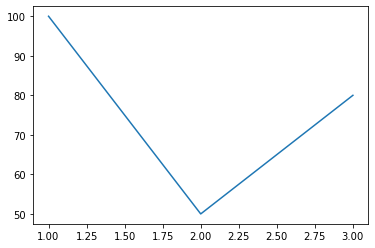

In [9]:
plt.plot([1,2,3],[100,50,80])

In [10]:
df.loc[:,'Date']

0       2016-01-01
1       2016-01-04
2       2016-01-05
3       2016-01-06
4       2016-01-07
           ...    
1319    2021-01-21
1320    2021-01-22
1321    2021-01-24
1322    2021-01-25
1323    2021-01-26
Name: Date, Length: 1324, dtype: object

(1324, 4)


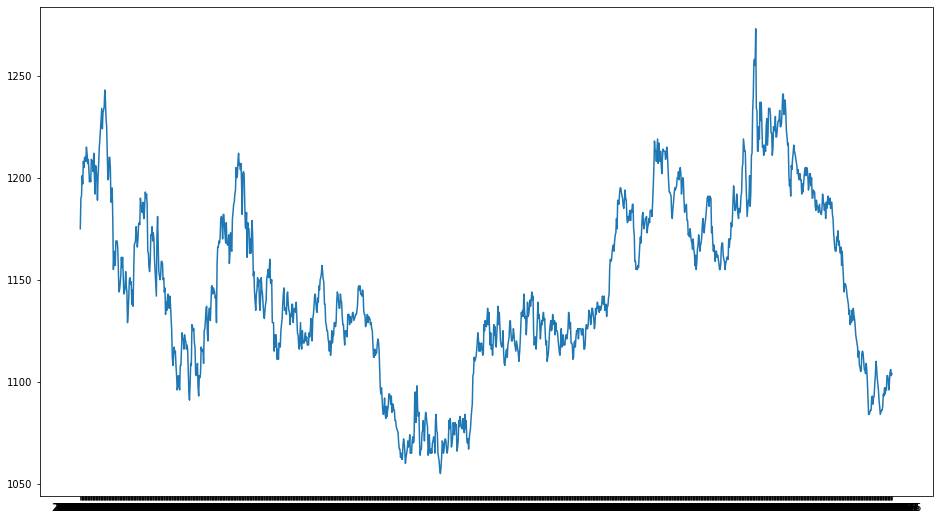

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[:,'Date'],xy[:,3])      # 전체 종가 Close
print(xy.shape)

In [12]:
window = 7 # window size 
dataDim = 4 # Open, High, Low, Close
hiddenDim = 10 
outputDim = 1
lr = 0.01
iterations = 500

trainSize = int(len(xy)*0.8)   # 80%만 train
print(xy[0:trainSize])
trainSet = xy[:trainSize]
testSet = xy[trainSize-window:]  # trainsize - windowsize 부터 끝까지 test

trainSet = MinMaxScaler(trainSet)
testSet = MinMaxScaler(testSet)
print(trainSet)
def buildDataSet(data, window):
    xdata = []
    ydata = []
    for i in range(0, len(data)-window):
        xdata.append(data[i:i+window,:-1])  # 행은 7개씩, 열은 마지막 종가 빼고 다
        ydata.append(data[i+window,[-1]])   # 행은 그 다음 행 하나랑, 열은 종가만
    return np.array(xdata), np.array(ydata)
    
trainX, trainY=buildDataSet(trainSet, window)
testX, testY=buildDataSet(testSet, window)

[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1161 1163 1157 1160]
 [1160 1171 1158 1170]
 [1170 1170 1162 1166]]
[[0.64021164 0.62903226 0.67032967 0.63829787]
 [0.64021164 0.71505376 0.67582418 0.71808511]
 [0.71428571 0.71505376 0.71978022 0.72340426]
 ...
 [0.56084656 0.55376344 0.57142857 0.55851064]
 [0.55555556 0.59677419 0.57692308 0.61170213]
 [0.60846561 0.59139785 0.5989011  0.59042553]]


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, activation='tanh', input_shape=[7,3]))   # 처음 세트 7개랑 열은 3개
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                140       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
66/66 [==============================] - 1s 906us/step - loss: 0.0102 - mae: 0.0743
Epoch 2/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0026 - mae: 0.0401
Epoch 3/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0023 - mae: 0.0373
Epoch 4/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0022 - mae: 0.0365
Epoch 5/1000
66/66 [==============================] - 0s 846us/step - loss: 0.0021 - mae: 0.0352
Epoch 6/1000
66/66 [==============================] - 0s 848us/step - loss: 0.0019 - mae: 0.0340
Epoch 7/1000
66/66 [==============================] - 0s 843us/step - loss: 0.0018 - mae: 0.0329
Epoch 8/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0016 - mae: 0.0316
Epoch 9/1000
66/66 [==============================] - 0s 853us/step - loss: 0.0017 - mae: 0.0325
Epoch 10/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0015 - mae: 0.0309
Epoch 11/1000
66/66 [========

66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0263
Epoch 85/1000
66/66 [==============================] - 0s 847us/step - loss: 0.0012 - mae: 0.0266
Epoch 86/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0013 - mae: 0.0274
Epoch 87/1000
66/66 [==============================] - 0s 837us/step - loss: 0.0010 - mae: 0.0245
Epoch 88/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0013 - mae: 0.0275
Epoch 89/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0013 - mae: 0.0275
Epoch 90/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0259
Epoch 91/1000
66/66 [==============================] - 0s 838us/step - loss: 0.0012 - mae: 0.0267
Epoch 92/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0259
Epoch 93/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0263
Epoch 94/1000
66/66 [=============

Epoch 167/1000
66/66 [==============================] - 0s 825us/step - loss: 0.0011 - mae: 0.0263
Epoch 168/1000
66/66 [==============================] - 0s 813us/step - loss: 0.0011 - mae: 0.0258
Epoch 169/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0254
Epoch 170/1000
66/66 [==============================] - 0s 813us/step - loss: 0.0011 - mae: 0.0250
Epoch 171/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0013 - mae: 0.0276
Epoch 172/1000
66/66 [==============================] - 0s 837us/step - loss: 0.0011 - mae: 0.0253
Epoch 173/1000
66/66 [==============================] - 0s 827us/step - loss: 0.0011 - mae: 0.0251
Epoch 174/1000
66/66 [==============================] - 0s 848us/step - loss: 0.0011 - mae: 0.0255
Epoch 175/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0257
Epoch 176/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0257
Epoch 177/

66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0258
Epoch 250/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0011 - mae: 0.0259
Epoch 251/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0012 - mae: 0.0263
Epoch 252/1000
66/66 [==============================] - 0s 890us/step - loss: 0.0011 - mae: 0.0258
Epoch 253/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0012 - mae: 0.0263
Epoch 254/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0249
Epoch 255/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0258
Epoch 256/1000
66/66 [==============================] - 0s 867us/step - loss: 0.0012 - mae: 0.0262
Epoch 257/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0251
Epoch 258/1000
66/66 [==============================] - 0s 889us/step - loss: 0.0011 - mae: 0.0260
Epoch 259/1000
66/66 [===

66/66 [==============================] - 0s 825us/step - loss: 0.0011 - mae: 0.0247
Epoch 332/1000
66/66 [==============================] - 0s 850us/step - loss: 0.0011 - mae: 0.0253
Epoch 333/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0265
Epoch 334/1000
66/66 [==============================] - 0s 865us/step - loss: 0.0012 - mae: 0.0263
Epoch 335/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0244
Epoch 336/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0251
Epoch 337/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0260
Epoch 338/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0264
Epoch 339/1000
66/66 [==============================] - 0s 835us/step - loss: 0.0011 - mae: 0.0260
Epoch 340/1000
66/66 [==============================] - 0s 840us/step - loss: 0.0011 - mae: 0.0254
Epoch 341/1000
66/66 [===

66/66 [==============================] - 0s 871us/step - loss: 0.0011 - mae: 0.0256
Epoch 414/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0257
Epoch 415/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0265
Epoch 416/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0253
Epoch 417/1000
66/66 [==============================] - 0s 982us/step - loss: 0.0010 - mae: 0.0249
Epoch 418/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0010 - mae: 0.0246
Epoch 419/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0270
Epoch 420/1000
66/66 [==============================] - 0s 848us/step - loss: 0.0011 - mae: 0.0260
Epoch 421/1000
66/66 [==============================] - 0s 838us/step - loss: 0.0012 - mae: 0.0261
Epoch 422/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0254
Epoch 423/1000
66/66 [===========

Epoch 496/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0259
Epoch 497/1000
66/66 [==============================] - 0s 853us/step - loss: 0.0010 - mae: 0.0246
Epoch 498/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0258
Epoch 499/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0256
Epoch 500/1000
66/66 [==============================] - 0s 834us/step - loss: 0.0011 - mae: 0.0256
Epoch 501/1000
66/66 [==============================] - 0s 832us/step - loss: 0.0011 - mae: 0.0253
Epoch 502/1000
66/66 [==============================] - 0s 830us/step - loss: 0.0011 - mae: 0.0256
Epoch 503/1000
66/66 [==============================] - 0s 832us/step - loss: 0.0011 - mae: 0.0253
Epoch 504/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0262
Epoch 505/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0259
Epoch 506/10

66/66 [==============================] - 0s 824us/step - loss: 0.0012 - mae: 0.0263
Epoch 579/1000
66/66 [==============================] - 0s 837us/step - loss: 0.0011 - mae: 0.0257
Epoch 580/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0261
Epoch 581/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0260
Epoch 582/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0256
Epoch 583/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0264
Epoch 584/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0261
Epoch 585/1000
66/66 [==============================] - 0s 877us/step - loss: 0.0011 - mae: 0.0253
Epoch 586/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0012 - mae: 0.0261
Epoch 587/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0011 - mae: 0.0253
Epoch 588/1000
66/66 [===

66/66 [==============================] - 0s 921us/step - loss: 9.9106e-04 - mae: 0.0245
Epoch 661/1000
66/66 [==============================] - 0s 920us/step - loss: 0.0011 - mae: 0.0261
Epoch 662/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0269
Epoch 663/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0260
Epoch 664/1000
66/66 [==============================] - 0s 905us/step - loss: 0.0012 - mae: 0.0261
Epoch 665/1000
66/66 [==============================] - 0s 863us/step - loss: 0.0011 - mae: 0.0255
Epoch 666/1000
66/66 [==============================] - 0s 899us/step - loss: 0.0011 - mae: 0.0252
Epoch 667/1000
66/66 [==============================] - 0s 868us/step - loss: 0.0011 - mae: 0.0254
Epoch 668/1000
66/66 [==============================] - 0s 894us/step - loss: 0.0011 - mae: 0.0255
Epoch 669/1000
66/66 [==============================] - 0s 881us/step - loss: 0.0011 - mae: 0.0253
Epoch 670/1000
66/66 [===

66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0254
Epoch 744/1000
66/66 [==============================] - 0s 840us/step - loss: 0.0010 - mae: 0.0246
Epoch 745/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0012 - mae: 0.0269
Epoch 746/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0260
Epoch 747/1000
66/66 [==============================] - 0s 845us/step - loss: 0.0010 - mae: 0.0251
Epoch 748/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0248
Epoch 749/1000
66/66 [==============================] - 0s 842us/step - loss: 0.0011 - mae: 0.0253
Epoch 750/1000
66/66 [==============================] - 0s 818us/step - loss: 0.0012 - mae: 0.0267
Epoch 751/1000
66/66 [==============================] - 0s 890us/step - loss: 0.0012 - mae: 0.0261
Epoch 752/1000
66/66 [==============================] - 0s 875us/step - loss: 0.0011 - mae: 0.0251
Epoch 753/1000
66/66 [===

66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0261
Epoch 826/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0254
Epoch 827/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0250
Epoch 828/1000
66/66 [==============================] - 0s 860us/step - loss: 0.0011 - mae: 0.0262
Epoch 829/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0259
Epoch 830/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0251
Epoch 831/1000
66/66 [==============================] - 0s 813us/step - loss: 0.0013 - mae: 0.0264
Epoch 832/1000
66/66 [==============================] - 0s 862us/step - loss: 0.0012 - mae: 0.0270
Epoch 833/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0252
Epoch 834/1000
66/66 [==============================] - 0s 848us/step - loss: 0.0011 - mae: 0.0251
Epoch 835/1000
66/66 [===

Epoch 908/1000
66/66 [==============================] - 0s 845us/step - loss: 0.0011 - mae: 0.0260
Epoch 909/1000
66/66 [==============================] - 0s 833us/step - loss: 0.0012 - mae: 0.0266
Epoch 910/1000
66/66 [==============================] - 0s 844us/step - loss: 9.7642e-04 - mae: 0.0241
Epoch 911/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0257
Epoch 912/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0012 - mae: 0.0265
Epoch 913/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0258
Epoch 914/1000
66/66 [==============================] - 0s 818us/step - loss: 0.0011 - mae: 0.0256
Epoch 915/1000
66/66 [==============================] - 0s 829us/step - loss: 9.9166e-04 - mae: 0.0243
Epoch 916/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0253
Epoch 917/1000
66/66 [==============================] - 0s 833us/step - loss: 0.0011 - mae: 0.0256
Ep

66/66 [==============================] - 0s 875us/step - loss: 0.0011 - mae: 0.0252
Epoch 991/1000
66/66 [==============================] - 0s 924us/step - loss: 0.0010 - mae: 0.0245
Epoch 992/1000
66/66 [==============================] - 0s 936us/step - loss: 0.0011 - mae: 0.0256
Epoch 993/1000
66/66 [==============================] - 0s 967us/step - loss: 0.0011 - mae: 0.0258
Epoch 994/1000
66/66 [==============================] - 0s 890us/step - loss: 0.0010 - mae: 0.0245
Epoch 995/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0011 - mae: 0.0252
Epoch 996/1000
66/66 [==============================] - 0s 854us/step - loss: 0.0011 - mae: 0.0254
Epoch 997/1000
66/66 [==============================] - 0s 844us/step - loss: 0.0011 - mae: 0.0255
Epoch 998/1000
66/66 [==============================] - 0s 859us/step - loss: 0.0012 - mae: 0.0262
Epoch 999/1000
66/66 [==============================] - 0s 829us/step - loss: 0.0011 - mae: 0.0257
Epoch 1000/1000
66/66 [==

In [15]:
# 모델 테스트 
res = model.evaluate(testX, testY, batch_size=16)
print("테스트 loss :",res[0],", 테스트 mae :",res[1])

17/17 [==============================] - 0s 687us/step - loss: 0.0015 - mae: 0.0283
테스트 loss : 0.0014822453958913684 , 테스트 mae : 0.028279893100261688


In [16]:
# 모델 사용
prediction = model.predict(testX)

print("MSE Evaluate : {}".format(np.average((prediction - testY)**2))) # mse인데 위에 loss랑 거의 같음
print(prediction)
# 원래 값으로 되돌리기 
predict1 = back_MinMax(xy[trainSize-window:,[-1]],prediction)
actual = back_MinMax(xy[trainSize-window:,[-1]],testY)
print(predict1)
# print(predict1.shape) == print(actual.shape) == (265, 1)

MSE Evaluate : 0.0014822453510257322
[[0.42382953]
 [0.45235285]
 [0.44549805]
 [0.49716717]
 [0.502685  ]
 [0.49608213]
 [0.55400354]
 [0.57282174]
 [0.58057857]
 [0.54071665]
 [0.55070204]
 [0.51184237]
 [0.5828506 ]
 [0.55019754]
 [0.521999  ]
 [0.50571215]
 [0.52594143]
 [0.522682  ]
 [0.5169237 ]
 [0.5582228 ]
 [0.5605546 ]
 [0.63340074]
 [0.6610656 ]
 [0.696722  ]
 [0.6557834 ]
 [0.6930361 ]
 [0.6668387 ]
 [0.64107114]
 [0.59212244]
 [0.5364077 ]
 [0.54323965]
 [0.5379448 ]
 [0.5574177 ]
 [0.61156374]
 [0.5423114 ]
 [0.57934207]
 [0.6377855 ]
 [0.6995339 ]
 [0.73244184]
 [0.8057843 ]
 [0.86108005]
 [0.9756514 ]
 [0.8205249 ]
 [0.9637414 ]
 [0.7818542 ]
 [0.7797518 ]
 [0.6621121 ]
 [0.69643646]
 [0.72247744]
 [0.66884136]
 [0.768116  ]
 [0.7616908 ]
 [0.7759504 ]
 [0.7488554 ]
 [0.6722358 ]
 [0.7188037 ]
 [0.6720302 ]
 [0.6712585 ]
 [0.7025033 ]
 [0.67023206]
 [0.71262556]
 [0.74314904]
 [0.68704295]
 [0.71935457]
 [0.78208625]
 [0.77394575]
 [0.76086795]
 [0.7704589 ]
 [0.7382991

In [17]:
print(trainSize)

1059


In [18]:
df.loc[trainSize:,'Date']

1059    2020-01-23
1060    2020-01-24
1061    2020-01-27
1062    2020-01-28
1063    2020-01-29
           ...    
1319    2021-01-21
1320    2021-01-22
1321    2021-01-24
1322    2021-01-25
1323    2021-01-26
Name: Date, Length: 265, dtype: object

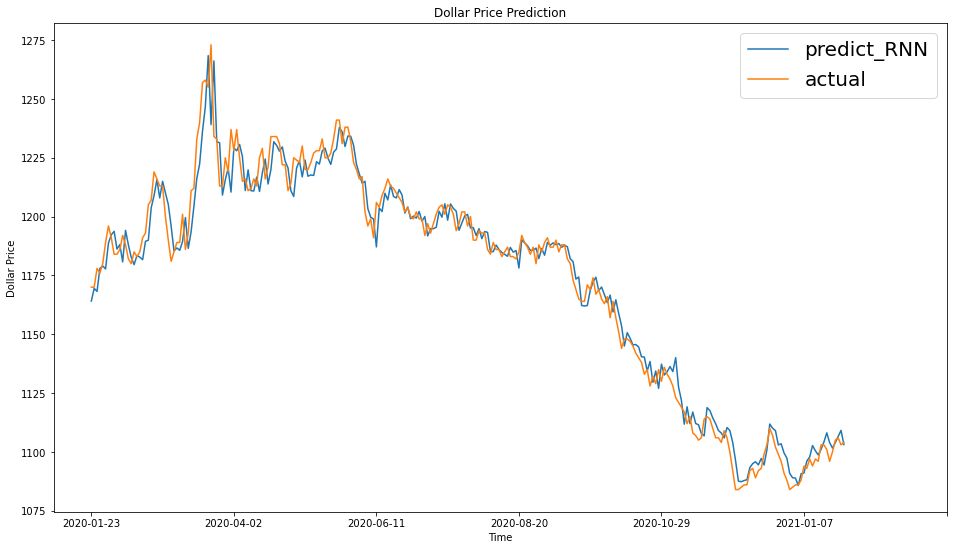

In [19]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict1, label = "predict_RNN")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,325,50))
plt.title('Dollar Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dollar Price')
plt.legend(prop={'size': 20})

In [20]:
model2 = keras.Sequential()

model2.add(layers.LSTM(units=10, activation='tanh', input_shape=[7,3]))

model2.add(layers.Dense(1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.fit(trainX, trainY, epochs=1000, batch_size=16)

Epoch 1/1000
66/66 [==============================] - 2s 2ms/step - loss: 0.0302 - mae: 0.1310
Epoch 2/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0461
Epoch 3/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0397
Epoch 4/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0389
Epoch 5/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0374
Epoch 6/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0395
Epoch 7/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0373
Epoch 8/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0024 - mae: 0.0380
Epoch 9/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0024 - mae: 0.0373
Epoch 10/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0362
Epoch 11/1000
66/66 [============================

66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0257
Epoch 87/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0269
Epoch 88/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0280
Epoch 89/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0269
Epoch 90/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0269
Epoch 91/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0269
Epoch 92/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0277
Epoch 93/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0267
Epoch 94/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 95/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0262
Epoch 96/1000
66/66 [==============================] -

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 171/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0013 - mae: 0.0271
Epoch 172/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0258
Epoch 173/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0259
Epoch 174/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 175/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0275
Epoch 176/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0266
Epoch 177/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0254
Epoch 178/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0267
Epoch 179/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0261
Epoch 180/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0255
Epoch 255/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0245
Epoch 256/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0260
Epoch 257/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0248
Epoch 258/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0271
Epoch 259/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0255
Epoch 260/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0258
Epoch 261/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0260
Epoch 262/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0257
Epoch 263/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0254
Epoch 264/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0259
Epoch 339/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0262
Epoch 340/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0246
Epoch 341/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0262
Epoch 342/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0249
Epoch 343/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0254
Epoch 344/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0261
Epoch 345/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0257
Epoch 346/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0251
Epoch 347/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0261
Epoch 348/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0257
Epoch 423/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0261
Epoch 424/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0262
Epoch 425/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0258
Epoch 426/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0261
Epoch 427/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0251
Epoch 428/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0260
Epoch 429/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0257
Epoch 430/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0262
Epoch 431/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0260
Epoch 432/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0263
Epoch 507/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0265
Epoch 508/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0255
Epoch 509/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0254
Epoch 510/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0258
Epoch 511/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0265
Epoch 512/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0267
Epoch 513/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0252
Epoch 514/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0252
Epoch 515/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0247
Epoch 516/1000
66/66 [=======================

66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0257
Epoch 591/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0257
Epoch 592/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0260
Epoch 593/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0010 - mae: 0.0248
Epoch 594/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0257
Epoch 595/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0254
Epoch 596/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0268
Epoch 597/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0255
Epoch 598/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0258
Epoch 599/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0262
Epoch 600/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 675/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0259
Epoch 676/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 677/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0256
Epoch 678/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0268
Epoch 679/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0010 - mae: 0.0252
Epoch 680/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0250
Epoch 681/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0261
Epoch 682/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0256
Epoch 683/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0261
Epoch 684/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0251
Epoch 759/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0257
Epoch 760/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0251
Epoch 761/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0258
Epoch 762/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0249
Epoch 763/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0260
Epoch 764/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0260
Epoch 765/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0257
Epoch 766/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0253
Epoch 767/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0257
Epoch 768/1000
66/66 [=======================

66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - mae: 0.0252
Epoch 843/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0266
Epoch 844/1000
66/66 [==============================] - 0s 2ms/step - loss: 9.9626e-04 - mae: 0.0239
Epoch 845/1000
66/66 [==============================] - 0s 1ms/step - loss: 9.8301e-04 - mae: 0.0241
Epoch 846/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0010 - mae: 0.0241
Epoch 847/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0010 - mae: 0.0248
Epoch 848/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0249
Epoch 849/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0262
Epoch 850/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0254
Epoch 851/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0254
Epoch 852/1000
66/66 [===============

66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0251
Epoch 927/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0257
Epoch 928/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0012 - mae: 0.0257
Epoch 929/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0253
Epoch 930/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0252
Epoch 931/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0258
Epoch 932/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0251
Epoch 933/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0255
Epoch 934/1000
66/66 [==============================] - 0s 1ms/step - loss: 0.0011 - mae: 0.0248
Epoch 935/1000
66/66 [==============================] - 0s 1ms/step - loss: 9.4804e-04 - mae: 0.0242
Epoch 936/1000
66/66 [===================

In [22]:
# 모델 테스트 
res2 = model2.evaluate(testX, testY, batch_size=16)
print("loss :",res2[0],", mae :",res2[1])

17/17 [==============================] - 0s 748us/step - loss: 0.0016 - mae: 0.0298
loss : 0.0016425872454419732 , mae : 0.02976687252521515


In [23]:
print(testX.shape)
print(testX)
prediction = model2.predict(testX)

print("Evaluate : {}".format(np.average((prediction - testY)**2)))
print(prediction)
# 원래 값으로 되돌리기 
predict2 = back_MinMax(xy[trainSize-window:,[-1]],prediction)
actual = back_MinMax(xy[trainSize-window:,[-1]],testY)

(265, 7, 3)
[[[0.37566138 0.35748792 0.40804598]
  [0.39153439 0.37198068 0.43678161]
  [0.3968254  0.36714976 0.44252874]
  ...
  [0.40740741 0.37198068 0.44252874]
  [0.4021164  0.41062802 0.44827586]
  [0.45502646 0.4057971  0.47126437]]

 [[0.39153439 0.37198068 0.43678161]
  [0.3968254  0.36714976 0.44252874]
  [0.40740741 0.36714976 0.44252874]
  ...
  [0.4021164  0.41062802 0.44827586]
  [0.45502646 0.4057971  0.47126437]
  [0.43386243 0.41062802 0.48850575]]

 [[0.3968254  0.36714976 0.44252874]
  [0.40740741 0.36714976 0.44252874]
  [0.40740741 0.37198068 0.44252874]
  ...
  [0.45502646 0.4057971  0.47126437]
  [0.43386243 0.41062802 0.48850575]
  [0.44973545 0.41062802 0.5       ]]

 ...

 [[0.07407407 0.0821256  0.08045977]
  [0.06349206 0.09178744 0.0862069 ]
  [0.10582011 0.10628019 0.12643678]
  ...
  [0.0952381  0.0821256  0.09770115]
  [0.06878307 0.0821256  0.09770115]
  [0.08465608 0.10144928 0.1091954 ]]

 [[0.06349206 0.09178744 0.0862069 ]
  [0.10582011 0.10628019 

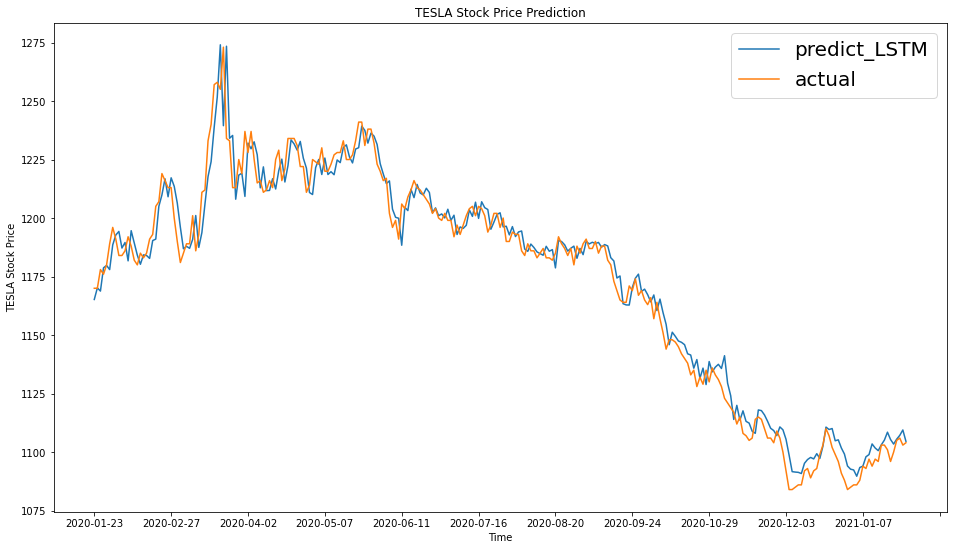

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict2, label = "predict_LSTM")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,300,25))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend(prop={'size': 20})

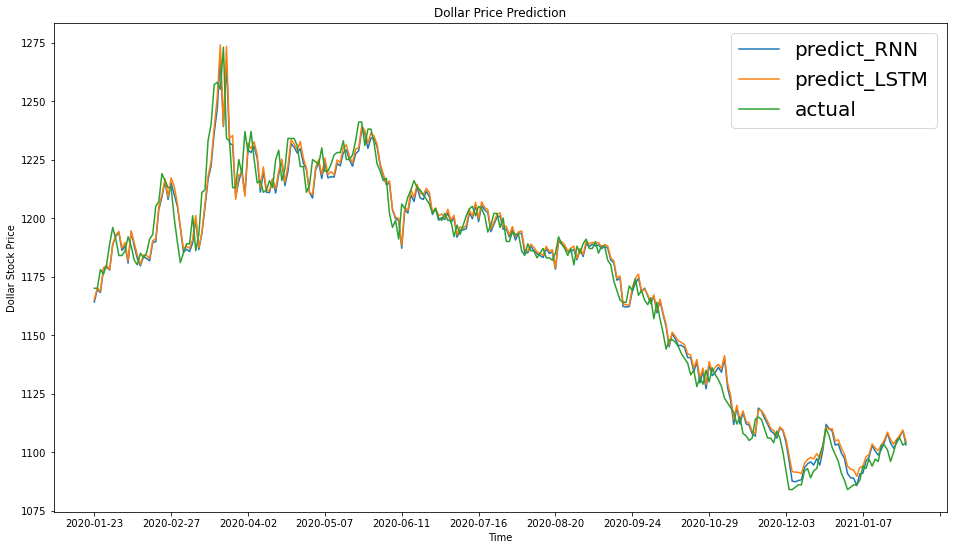

In [25]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict1, label = "predict_RNN")
plt.plot(predict2, label = "predict_LSTM")
plt.plot(actual,label = "actual")
plt.xticks(np.arange(0,300,25))
plt.title('Dollar Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dollar Stock Price')
plt.legend(prop={'size': 20})

In [26]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = MinMaxScaler(xy[len(xy)-window:, :-1])     # 정규화
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
recent_data = tf.expand_dims(recent_data,0)     # 3차원으로 늘려줌
print("recent_data.shape:", recent_data.shape)
# 내일 종가를 예측해본다
tomorrow = model2.predict(recent_data)

print("Tomorrow_predict", tomorrow)
tomorrow = back_MinMax(xy[len(xy)-window:, [-1]],tomorrow) # 금액데이터 역정규화한다
print("Tomorrow's stock price", tomorrow) # 예측한 주가를 출력한다

recent_data.shape: (7, 3)
recent_data: [[0.77777778 0.75       0.33333333]
 [0.55555556 0.         0.        ]
 [0.         0.         0.        ]
 [0.33333333 1.         0.22222222]
 [1.         0.75       1.        ]
 [1.         0.75       0.33333333]
 [0.66666667 0.5        0.44444444]]
recent_data.shape: (1, 7, 3)
Tomorrow_predict [[0.4400471]]
Tomorrow's stock price [[1100.40047085]]


In [27]:
print(xy)
print(xy.shape)    # numpy.ndarray

[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1106 1106 1106 1106]
 [1106 1106 1100 1103]
 [1103 1105 1101 1104]]
(1324, 4)


In [28]:
for i in range(0,10):
    xdata = []
    xdata.append(MinMaxScaler(xy[len(xy)-7:,:-1]))    # 정규화
    print('------------------------')
    print(np.array(xdata).shape)
    xdata = np.array(xdata)
    #xdata = tf.expand_dims(xdata,0)
    ydata = model2.predict(xdata)     # 예측한 값 ydata에 넣어주기
    ydata = back_MinMax(xy[len(xy)-7:, [-1]],ydata)      # 금액데이터 역정규화
    print('예측한 새로운 값 : ',ydata[0][0])
    print(xy)
    xy = np.append(xy,np.array([[ydata[0][0],ydata[0][0],ydata[0][0],ydata[0][0]]], dtype = np.int32),axis = 0)    # xy 원래 파일에 새로 예측한 달러값 더해주기 
    print(xy)

------------------------
(1, 7, 3)
예측한 새로운 값 :  1100.4004708528519
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1106 1106 1106 1106]
 [1106 1106 1100 1103]
 [1103 1105 1101 1104]]
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1106 1106 1100 1103]
 [1103 1105 1101 1104]
 [1100 1100 1100 1100]]
------------------------
(1, 7, 3)
예측한 새로운 값 :  1096.5568346753716
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1106 1106 1100 1103]
 [1103 1105 1101 1104]
 [1100 1100 1100 1100]]
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1103 1105 1101 1104]
 [1100 1100 1100 1100]
 [1096 1096 1096 1096]]
------------------------
(1, 7, 3)
예측한 새로운 값 :  1095.8121057450771
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [1103 1105 1101 1104]
 [1100 1100 1100 1100]
 [1096 1096 1096 1096]]
[[1176 1177 1175 1175]
 [1176 1193 1176 1190]
 [1190 1193 1184 1191]
 ...
 [110

In [29]:
ydata =4
re = np.array([[1176, 1177, 1175, 1175],
 [1170, 1170, 1162, 1166]])
re = np.append(re,np.array([[ydata,ydata,ydata,ydata]]),axis = 0)   # axis = 0으로 행을 새로 추가
print(re)
print(re[-1])
print(re.shape)

[[1176 1177 1175 1175]
 [1170 1170 1162 1166]
 [   4    4    4    4]]
[4 4 4 4]
(3, 4)


In [30]:
ydata =4
re = np.array([[1176, 1177, 1175, 1175],
 [1170, 1170, 1162, 1166]])
re = np.append(re,np.array([ydata,ydata,ydata,ydata]))       # []로 형식 맞춰줘야 한다
print(re)
print(re[-1])
print(re.shape)

[1176 1177 1175 1175 1170 1170 1162 1166    4    4    4    4]
4
(12,)


In [31]:
print('10일간의 미래 예측 : ',xy[len(xy)-10:, [-1]])

10일간의 미래 예측 :  [[1100]
 [1096]
 [1095]
 [1095]
 [1096]
 [1097]
 [1097]
 [1097]
 [1097]
 [1096]]


In [32]:
# 날짜 pandas로 만들기
date = pd.DataFrame({'Date':['2021-01-26',
                             '2021-01-27',
                            '2021-01-28',
                            '2021-01-29',
                            '2021-01-30',
                            '2021-01-31',
                            '2021-02-01',
                            '2021-02-02',
                            '2021-02-03',
                            '2021-02-04',
                            '2021-02-05']})
print(date)

          Date
0   2021-01-26
1   2021-01-27
2   2021-01-28
3   2021-01-29
4   2021-01-30
5   2021-01-31
6   2021-02-01
7   2021-02-02
8   2021-02-03
9   2021-02-04
10  2021-02-05


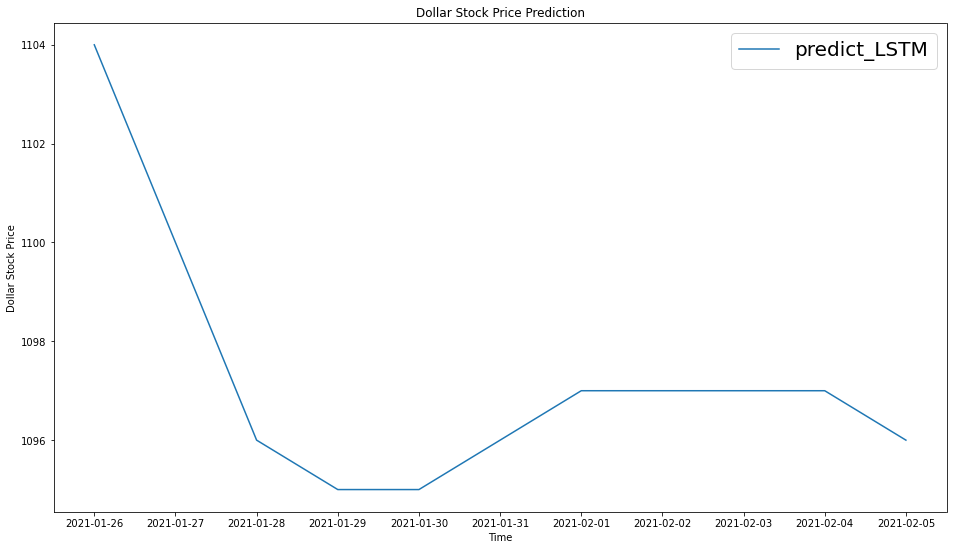

In [35]:
plt.figure(figsize=(16, 9))
plt.plot(date.loc[:,'Date'],xy[len(xy)-11:, [-1]], label = "predict_LSTM")
plt.title('Dollar Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dollar Stock Price')
plt.legend(prop={'size': 20})

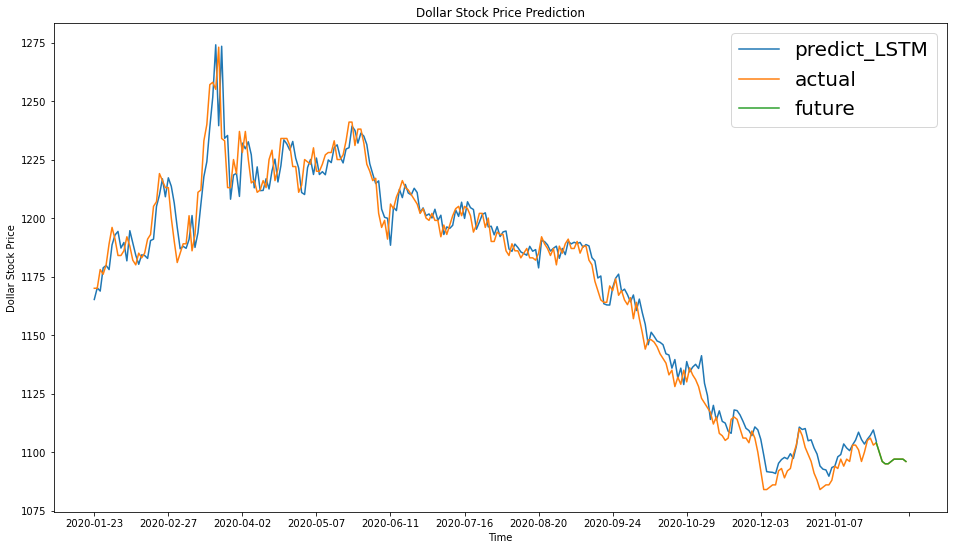

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(df.loc[trainSize:,'Date'],predict2, label = "predict_LSTM")
plt.plot(xy[trainSize:, [-1]],label = "actual")
plt.plot(date.loc[:,'Date'],xy[len(xy)-11:, [-1]], label = "future")

#matplotlib에서 그림을 그릴 때, tick을 몇 개나, 또 어떤 label로 표현할지를 조절하고 싶을때 plt.xticks()를 사용
plt.xticks(np.arange(0,300,25))
plt.title('Dollar Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dollar Stock Price')
plt.legend(prop={'size': 20})